In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Assignment 8

## Andrew Loeppky

## Cloud Microphysics, ETH Fall 2020

You are planning a cloud seeding experiment and want to estimate what you expect to happen.  For context,  cloud  seeding  is  the  process  of  intentionally  altering  the  formation  and  evolution  of  cloud particles (cloud droplets or ice) using efficient CCN or INPs to, for example, decrease the likelihood of large hail falling to the surface or to reduce the lifetime of high-altitude ice clouds as a geoengineering method.  In this assignment our goal is to completely dissipate a cloud containing a certain number of cloud droplets.  For more context on cloud seeding, you can refer to section 15.5 of the textbook (Wang, 2013). 

Assume a stable cloud composed of a uniform distribution of supercooled water droplets with a radius of 5μm and a number concentration of 200 cm−3.  The cloud top is at an altitude of 5 km, with a thickness of 1 km and a constant temperature of -15°C. 

In the experiment, cloud seeding particles with a radius of 1μm and a density of 2 g cm−3 are released from  an  aircraft  at  the  top  of  the  cloud.   Assume  that  the  seeding  particles  lead  to  cloud  droplet freezing as soon as they get immersed into a cloud droplet.

**1.  (7 points) Estimate how large (radius) the ice crystals will grow by vapor diffusion by the time they reach cloud base. State any assumptions you use. Is your result an over or underestimation?**

•Use the following equation:

$$
\frac{dm}{dt}= \frac{4\pi C(S_{v,i}−1)}{3.01e7}
$$

where $C$ is the crystal capacitance (in units of m),$S_{v,i}$ is the saturation ratio over ice, and the denominator has units of (m.s.kg−1).

•Assume that ice crystals with a radius smaller than 50μm do not sediment and larger ice crystals  fall  with  a  constant  velocity  of  $0.5  m/s$.   You  can  further  assume  spherical  ice crystals, constant water saturation in the cloud, and you can neglect ventilation.

•Plot the ice crystals radius vs. time to answer the question.  Show all the steps you used to get to the final radius vs. time plot.

In [57]:
# Define some initial variables
T = 273.15 - 15. # K
R = 8.314 # J/mol K
droprad = 5e-6 # m
dropcon = 200e6 # m^-3
rho_i = 920. # kg/m3
rho_w = 1000. #kg/m3
v_w = 1.802e-5 # molar volume of water m^3/mol
sigma_vw = 0.728 # J/m2

Set $C=r$, and substitute a mass element for a volume element using:

$$
dm = \rho dV
$$

$$
\rho \frac{dV}{dt} = \frac{4\pi(S_{vi}-1)}{3.01e7}r
$$

express $r$ in terms of volume and integrate:

$$
V = \frac{4}{3}\pi r^3 => r=\left(\frac{3V}{4\pi}\right)^{\frac{1}{3}}
$$

$$
\int^{V'}_{V_0}\frac{dV}{V^{\frac{1}{3}}} = \frac{4\pi(S_{iv}-1)}{\rho 3.01e7}\left(\frac{3}{4\pi}\right)^{\frac{1}{3}} \int_{0}^{t'}dt
$$

$$
\frac{3}{2}V^{\frac{2}{3}} + C = \frac{4\pi(S_{iv}-1)}{\rho 3.01e7}\left(\frac{3}{4\pi}\right)^{\frac{1}{3}}t
$$

Note the LHS is in units of $V^{\frac{2}{3}}=l^2$ length squared. Again, assuming spherical particles:

$$
V^{\frac{2}{3}} = \frac{2}{3}\frac{4\pi(S_{iv}-1)}{\rho 3.01e7}\left(\frac{3}{4\pi}\right)^{\frac{1}{3}}t + l^2
$$

$$
\left(\frac{4}{3}\pi\right)^{\frac{2}{3}} r^2 = \frac{2}{3}\frac{4\pi(S_{iv}-1)}{\rho 3.01e7}\left(\frac{3}{4\pi}\right)^{\frac{1}{3}}t + l^2
$$

$$
r = \sqrt{\left(\frac{3}{4\pi}\right)^{\frac{2}{3}}\frac{2}{3}\frac{4\pi(S_{iv}-1)}{\rho 3.01e7}\left(\frac{3}{4\pi}\right)^{\frac{1}{3}}t + l^2}
$$

$$
\boxed{r(t) = \sqrt{\frac{2(S_{iv}-1)}{\rho 3.01e7}t + r_0^2}}
$$

We arrive at an equation for $r(t)$ evolving with time. Sanity check: at $t=0$, $r(0) = \sqrt{r_0^2} = r_0$, and droplet growth slows with time (As the spherical particle grows, adding a "layer" of ice takes longer because surface area increases faster than the radius.

Next, we need to calculate $S_{iv}$, the supersaturation with respect to ice over vapour. The problem gives us a stable (steady state) cloud with 5$\mu m$ droplets, which we can use to find $S$.

$$
\frac{e_{sat,a}}{e_{sat,\infty}} = exp\left(\frac{2\nu_w\sigma}{RTa}\right) \tag{Kelvin eqn, Wang 5.51}
$$

$$
ln(e_{sat,w}) \approx 54.842763 - \frac{6763.22}{T}-4.210ln(T) + 0.000367T + tanh(0.0414(T-218.8))\cdot(53.878-\frac{1331.22}{T} - 9.44523ln(T) + 0.014025T) \tag{Wang 4.37}
$$

$$
e_{sat,i} = exp\left(9.550426 - \frac{5723.265}{T} + 3.52068ln(T) - 0.00728332T\right) \tag{Wang 4.38}
$$

Use 5.51 to find the saturation vapour pressure wrt water, then multiply by the ratio $\frac{e_{sat,w}}{e_{sat,i}}$ to find $S_{vi}$

In [38]:
S_vw = np.exp(2 * v_w * sigma_vw / (R * T * droprad)) # eqn 5.51
print(f' S_vw = {S_vw}')

 S_vw = 1.0024479076116457


In [39]:
e_satw = np.exp(
    54.842763
    - 6763.22 / T
    - 4.210 * np.log(T)
    + 0.000367 * T
    + np.tanh(0.0414 * (T - 218.8))
    * (53.878 - 1331.22 / T - 9.44523 * np.log(T) + 0.014025 * T)
) # eqn 4.37
print(f'e_satw = {e_satw} Pa')

e_satw = 191.322152205916 Pa


In [40]:
e_sati = np.exp(9.550426 - 5723.265 / T + 3.52068 * np.log(T) - 0.00728332 * T) # eqn 4.38
print(f'e_sati = {e_sati} Pa')

e_sati = 156.36125154252957 Pa


In [41]:
S_vi = S_vw * e_satw / e_sati
print(f'S_vi = {S_vi}')

S_vi = 1.2265858022146308


Sanity check \#2: Saturation over ice is higher than over water, as expected. We assume the crystals will remain in the cloud until $r = 50\mu m$, so set $r_0= 5\cdot10^{-5} m$. If sedimenting droplets fall at a constant rate $0.5m/s$, they will reach cloud base 1km below in:

$$
t = \frac{1000m}{0.5m/s} = 2000s
$$

Now plug our values into the equation for $r(t)$:

In [44]:
t = np.linspace(0,2000,2000) # s
r0 = 5e-5 # initial radius
r = np.sqrt((2*t*(S_vi - 1))/(rho_i*3.01e7) + r0**2)

Final radius at cloud base: 187.7 um


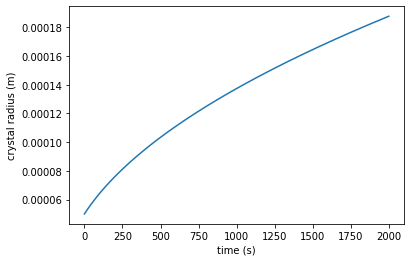

In [53]:
plt.plot(t,r)
plt.xlabel('time (s)')
plt.ylabel('crystal radius (m)')
print(f'Final radius at cloud base: {round(r[-1]*1e6,2)} um')

Discussion: We used some pretty bold assumptions to get to this answer. 

* The binary fall velocities may over- or underestimate the time spent growing. The droplets would in reality slowly gain speed as they grow, so the initial fall velocity (v=0) would cause an overestimation of crystal size, and the second fall velocity could over- or underestimate the size, depending on how close it is to the actual average fall velocity over the depth of the cloud.

* Constant supersaturation is also not entirely realistic. Growing crystals would deplete water vapour near them, and it would take a finite amount of time for more vapour to diffuse down-gradient to replace vapour consumed by the ice. 

**2.  (2  points)  How  many  seeding  particles  per  m3 would  you  need  to  dissipate  the  whole  cloud? Consider the entire cloud column and assume that each seeding particle leads to an ice crystalof the size you found in question 1 at cloud base.  State all your assumptions.  Based on your assumptions, is your result an over- or underestimation?**

Assiming the cloud is horizontally uniform, we can roughly estimate this by calculating the column-cloud water content and using our previous assumptions of constant saturation and no ventilation.

Consider a $1m^2$ column that stretches from cloud base to cloud top. The total amount of water in this column would be:

$$
CWC = V_{drop} (m^3) * droplet\space density \space (droplets/m^3) * volume \space of\space column \space(m^3)
$$

$$
= \frac{4}{3}\pi r_{drop}^3 * \rho_{drops} * A_{column}*h
$$

In [56]:
cloud_depth = 1000. # m
column_area = 1. # m2

CWC = 4/3 * np.pi * droprad**3 * dropcon * column_area * cloud_depth
print(f'water volume/m2 of cloud: {CWC} m3')

water volume/m2 of cloud: 0.00010471975511965979 m3


Now all we have to do is figure out what colume of water is consumed by each seeding particle and divide CWC by this value. We will retain our assumption that ice has a constant density of 920kg/m3 and water 1000kg/m3.

$$
V_{water} \space(m^3/seed) = \frac{4}{3}\pi r^3_{crystal} * \frac{\rho_w}{\rho_i}
$$

$$
\# seeds = \frac{CWC}{V_{water}} (seeds/m^2)
$$

In [62]:
Vwat = 4/3 * np.pi * r[-1]**3 * rho_w / rho_i
print(f'Each seed consumes {Vwat} m3 of cloud water')

Each seed consumes 3.010641857392225e-11 m3 of cloud water


In [67]:
numseeds = CWC / Vwat
print(f'To dissipate the cloud, we need {round(numseeds)} seeds per square meter.')

To dissipate the cloud, we need 3478320 seeds per square meter.


Discussion: 

* We assume that each seed is perfectly efficient at consuming vapour at the expense of the liquid droplets, but we know from the time series in question 1 that droplets will grow faster at base than cloud top. Assuming 100% efficiency is almost never a good idea in engineering, and this is likely an *underestimation* of the required number of seeds. 
* We have also completely ignored effects due to dynamics within the cloud, which are likely to be important in this sort of experiment.

**3.  (1 point) Provide one example of a good and bad material for cloud seeding**

* Good cloud seeds: K-feldspar - have been shown to act as efficient INPs in temperature ranges < -15C, and some activity at warmer temperatures (Kanji et al, 2017). It is also naturally occurring and therefore not an environmental risk.

* Bad cloud seeds: Most things are poor cloud seeds... Meatballs? While they are rich in organics (shown to increase IN ability, Bogler and Dedekind 2020), the terminal velocity of an tybical meatball is likely too fast to allow for efficient growth of ice crystals given length scales typical of mixed phase clouds. Environmental impacts of this method are discussed by Barret and Barret (1978) and revisited by Lord and Miller (2009), however, the scientific validity of their findings is debatable. (https://en.wikipedia.org/wiki/Cloudy_with_a_Chance_of_Meatballs)